In [1]:
import numpy as np
import pandas as pd


In [2]:
data1= pd.read_csv('/content/drive/MyDrive/sports dataset/results.csv')

data1

,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots
0,1,1,1,7,1,17,1,1,12
1,1,1,2,6,1,8,8,3,17
2,1,1,3,5,5,21,9,1,7
3,1,1,4,4,2,25,10,0,8
4,1,1,5,3,3,13,11,3,19
...,...,...,...,...,...,...,...,...,...
1507,2,54,1508,10,0,10,19,6,19
1508,2,54,1509,11,5,22,18,2,13
1509,2,54,1510,12,3,13,17,3,17
1510,2,54,1511,13,5,29,16,1,9


IT contains 2 seasons already i was asked to determine the winner of season 1. so dropping season id 2

In [3]:
data1 = data1.drop(data1[data1.SeasonID >1].index)
data1

,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots
0,1,1,1,7,1,17,1,1,12
1,1,1,2,6,1,8,8,3,17
2,1,1,3,5,5,21,9,1,7
3,1,1,4,4,2,25,10,0,8
4,1,1,5,3,3,13,11,3,19
...,...,...,...,...,...,...,...,...,...
751,1,54,752,17,1,15,26,2,9
752,1,54,753,18,2,12,25,0,9
753,1,54,754,19,3,21,24,1,6
754,1,54,755,20,0,8,23,2,6


first i created a column to make all home wins true and away or draw as false 

In [4]:
data1['winner of the match']= data1['HomeScore']>data1['AwayScore']
data1['draw']= data1['AwayScore']== data1['HomeScore']




i considered match won gets 3 points and draw gets 1 point. so i filtered the match winners in winner of match and draw is indicated as no winner. 

In [5]:

data1.loc[data1['winner of the match']==True ,'winner of the match']= 'home winner'
data1.loc[(data1['winner of the match']==False) & (data1['draw']==True) ,'winner of the match']= 'NO winner'
data1.loc[data1['winner of the match']==False ,'winner of the match']= 'away winner'
data1['goaldiffernce'] = data1['HomeScore'] - data1['AwayScore']
data1

,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots,winner of the match,draw,goaldiffernce
0,1,1,1,7,1,17,1,1,12,NO winner,True,0
1,1,1,2,6,1,8,8,3,17,away winner,False,-2
2,1,1,3,5,5,21,9,1,7,home winner,False,4
3,1,1,4,4,2,25,10,0,8,home winner,False,2
4,1,1,5,3,3,13,11,3,19,NO winner,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
751,1,54,752,17,1,15,26,2,9,away winner,False,-1
752,1,54,753,18,2,12,25,0,9,home winner,False,2
753,1,54,754,19,3,21,24,1,6,home winner,False,2
754,1,54,755,20,0,8,23,2,6,away winner,False,-2


Text(0, 0.5, 'Frequency')

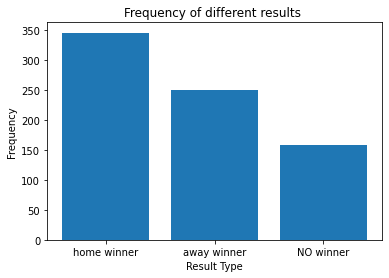

In [6]:
import matplotlib.pyplot as plt
fig, chart = plt.subplots()
data = data1['winner of the match'].value_counts()
points = data.index
frequency = data.values
chart.bar(points, frequency)
chart.set_title('Frequency of different results ')
chart.set_xlabel('Result Type')
chart.set_ylabel('Frequency')

In [7]:
data1.drop(['draw'], axis=1)


,SeasonID,Gameweek,MatchID,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots,winner of the match,goaldiffernce
0,1,1,1,7,1,17,1,1,12,NO winner,0
1,1,1,2,6,1,8,8,3,17,away winner,-2
2,1,1,3,5,5,21,9,1,7,home winner,4
3,1,1,4,4,2,25,10,0,8,home winner,2
4,1,1,5,3,3,13,11,3,19,NO winner,0
...,...,...,...,...,...,...,...,...,...,...,...
751,1,54,752,17,1,15,26,2,9,away winner,-1
752,1,54,753,18,2,12,25,0,9,home winner,2
753,1,54,754,19,3,21,24,1,6,home winner,2
754,1,54,755,20,0,8,23,2,6,away winner,-2


In [8]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()




data2 = data1.drop(['SeasonID',	'Gameweek',	'draw','MatchID','winner of the match','goaldiffernce','HomeScore','AwayScore','HomeShots','AwayShots'], axis= 1)


x= data2


y = data1["winner of the match"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
param_grid = {
    'n_estimators': list(range(1,220, 20)),
    'max_depth': list(range(1,220, 20))
}

# Perform grid search on n_estimators and max_depth
gridsearch = GridSearchCV(estimator = clf_random, param_grid=param_grid, verbose=10, scoring='accuracy')
gridsearch.fit(X_train,y_train)

print('Best Score: ', gridsearch.best_score_)
print('Best Params: ', gridsearch.best_params_)





random_forest_list = []
regression_list = []
svm_list = []
knn_list = []


for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    clf_random.fit(X_train,y_train)
    clf_logistic.fit(X_train,y_train)
    clf_svm.fit(X_train,y_train)
    clf_KNN.fit(X_train,y_train)
    
    
    
    rdf = clf_random.predict(X_test)
    acc_random = accuracy_score(y_test,rdf)
    random_forest_list.append(acc_random)

    log = clf_logistic.predict(X_test)
    acc_log = accuracy_score(y_test,log)
    regression_list.append(acc_log)
    
    svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test,svm)
    svm_list.append(acc_svm)
    
    knn = clf_KNN.predict(X_test)
    acc_knn = accuracy_score(y_test,knn)
    knn_list.append(acc_knn)

    

print("Random Forest Accuracy:", np.array(random_forest_list).mean(),np.array(random_forest_list).std())

print("Logistic Regression Accuracy:", np.array(regression_list).mean(),np.array(regression_list).std())

print("SVM Accuracy:", np.array(svm_list).mean(),np.array(svm_list).std())

print("KNN Accuracy:", np.array(knn_list).mean(),np.array(knn_list).std())


Fitting 5 folds for each of 121 candidates, totalling 605 fits
[CV 1/5; 1/121] START max_depth=1, n_estimators=1...............................
[CV 1/5; 1/121] END max_depth=1, n_estimators=1;, score=0.488 total time=   0.0s
[CV 2/5; 1/121] START max_depth=1, n_estimators=1...............................
[CV 2/5; 1/121] END max_depth=1, n_estimators=1;, score=0.529 total time=   0.0s
[CV 3/5; 1/121] START max_depth=1, n_estimators=1...............................
[CV 3/5; 1/121] END max_depth=1, n_estimators=1;, score=0.529 total time=   0.0s
[CV 4/5; 1/121] START max_depth=1, n_estimators=1...............................
[CV 4/5; 1/121] END max_depth=1, n_estimators=1;, score=0.512 total time=   0.0s
[CV 5/5; 1/121] START max_depth=1, n_estimators=1...............................
[CV 5/5; 1/121] END max_depth=1, n_estimators=1;, score=0.442 total time=   0.0s
[CV 1/5; 2/121] START max_depth=1, n_estimators=21..............................
[CV 1/5; 2/121] END max_depth=1, n_estimators=

In [9]:
x

,HomeTeamID,AwayTeamID
0,7,1
1,6,8
2,5,9
3,4,10
4,3,11
...,...,...
751,17,26
752,18,25
753,19,24
754,20,23


In [10]:
sec_season= pd.read_csv('/content/drive/MyDrive/sports dataset/fixtures.csv')
sec_season

,SeasonID,Gameweek,MatchID,HomeTeamID,AwayTeamID
0,2,1,757,2,1
1,2,1,758,28,3
2,2,1,759,27,4
3,2,1,760,26,5
4,2,1,761,25,6
...,...,...,...,...,...
751,2,54,1508,10,19
752,2,54,1509,11,18
753,2,54,1510,12,17
754,2,54,1511,13,16


In [11]:
xsecseason= sec_season.drop(['SeasonID','Gameweek','MatchID'],axis=1)
xsecseason

,HomeTeamID,AwayTeamID
0,2,1
1,28,3
2,27,4
3,26,5
4,25,6
...,...,...
751,10,19
752,11,18
753,12,17
754,13,16


In [12]:
rdf = clf_random.predict(xsecseason)
rdf

array(['away winner', 'home winner', 'NO winner', 'home winner',
       'away winner', 'home winner', 'NO winner', 'home winner',
       'NO winner', 'NO winner', 'home winner', 'away winner',
       'home winner', 'away winner', 'away winner', 'NO winner',
       'away winner', 'home winner', 'home winner', 'home winner',
       'home winner', 'home winner', 'away winner', 'away winner',
       'home winner', 'NO winner', 'away winner', 'away winner',
       'home winner', 'away winner', 'home winner', 'home winner',
       'home winner', 'NO winner', 'NO winner', 'away winner',
       'home winner', 'away winner', 'away winner', 'away winner',
       'away winner', 'home winner', 'away winner', 'home winner',
       'NO winner', 'away winner', 'home winner', 'home winner',
       'home winner', 'home winner', 'NO winner', 'home winner',
       'home winner', 'home winner', 'NO winner', 'away winner',
       'away winner', 'NO winner', 'home winner', 'home winner',
       'away winner

In [13]:
sec_season['winners'] = rdf

Text(0, 0.5, 'Frequency')

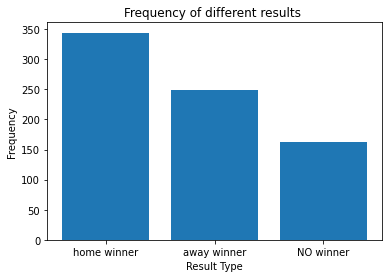

In [14]:
fig, chart = plt.subplots()
data = sec_season['winners'].value_counts()
points = data.index
frequency = data.values
chart.bar(points, frequency)
chart.set_title('Frequency of different results ')
chart.set_xlabel('Result Type')
chart.set_ylabel('Frequency')

In [15]:
team_ids_list = list(set(sec_season['HomeTeamID'].tolist()))
for each_team_id in team_ids_list:
  sec_season[each_team_id]=0
sec_season.head(5)

,SeasonID,Gameweek,MatchID,HomeTeamID,AwayTeamID,winners,1,2,3,4,...,19,20,21,22,23,24,25,26,27,28
0,2,1,757,2,1,away winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,758,28,3,home winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,759,27,4,NO winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,760,26,5,home winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,761,25,6,away winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def cal_points(row):
  if row['winners'] == 'home winner':
    row[row['HomeTeamID']]+=3
  elif row['winners'] == 'away winner':
    row[row['AwayTeamID']]+=3
  else:
    row[row['HomeTeamID']]+=1
    row[row['AwayTeamID']]+=1
  
  return row

sec_season= sec_season.apply(cal_points,axis=1)
sec_season.head(10)

,SeasonID,Gameweek,MatchID,HomeTeamID,AwayTeamID,winners,1,2,3,4,...,19,20,21,22,23,24,25,26,27,28
0,2,1,757,2,1,away winner,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,758,28,3,home winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,2,1,759,27,4,NO winner,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2,1,760,26,5,home winner,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
4,2,1,761,25,6,away winner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,762,24,7,home winner,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
6,2,1,763,23,8,NO winner,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2,1,764,22,9,home winner,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
8,2,1,765,21,10,NO winner,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,2,1,766,20,11,NO winner,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
sec_season['winners'][0]

'away winner'

In [18]:
groupby_agg = {id_: 'sum' for id_ in team_ids_list}
df_gameweek = sec_season.groupby(['Gameweek']).agg(groupby_agg).reset_index()
df_gameweek = df_gameweek.set_index('Gameweek')
df_gameweek.head(10)


,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Gameweek,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,1,0,3,0,1,0,1,...,3,1,1,3,1,3,0,3,1,3
2,0,0,0,3,3,1,0,3,3,0,...,0,3,3,3,3,3,0,0,3,1
3,0,0,3,3,3,3,0,3,0,0,...,3,0,3,3,0,0,0,1,1,3
4,3,0,0,1,3,0,1,3,3,3,...,0,0,1,3,0,0,0,0,1,0
5,3,0,3,1,1,1,1,1,1,0,...,1,0,1,0,0,3,0,1,1,1
6,1,0,0,1,3,3,1,3,3,3,...,3,0,3,0,3,1,0,0,0,1
7,1,0,0,0,3,3,3,3,0,3,...,3,0,1,3,3,0,0,0,3,0
8,3,1,0,1,3,3,0,3,0,0,...,3,3,1,0,3,1,0,0,1,3
9,3,0,3,3,0,1,3,3,0,0,...,0,0,3,3,3,0,0,1,3,0


In [19]:
df_gw_cum = df_gameweek.cumsum(axis = 0)
df_gw_cum.tail(10)


,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Gameweek,,,,,,,,,,,,,,,,,,,,,
45,66,26,44,93,99,78,94,101,57,21,...,84,30,73,67,68,71,27,40,90,63
46,69,27,45,94,102,81,94,101,60,21,...,85,31,74,70,68,74,27,40,93,63
47,70,27,48,95,105,82,94,102,60,24,...,88,31,77,73,71,74,27,40,94,63
48,71,27,51,95,108,85,97,105,63,24,...,88,31,77,76,71,77,27,40,94,63
49,71,27,51,98,111,88,100,108,66,27,...,91,31,77,77,71,78,27,40,94,63
50,72,27,51,101,112,91,100,111,69,27,...,94,31,78,77,74,81,27,40,97,66
51,72,27,54,104,115,91,103,114,69,27,...,97,31,81,77,77,84,27,40,100,66
52,75,27,57,107,118,94,103,117,69,27,...,100,31,84,77,77,84,27,43,100,69
53,78,27,57,110,118,97,106,120,72,30,...,103,31,87,80,80,84,30,43,103,69


In [20]:
df_gw_cum.idxmax(axis=1)

Gameweek
1      1
2     15
3     17
4     22
5     15
6     15
7      8
8      8
9      8
10    15
11     8
12    15
13    15
14    15
15     8
16     8
17     8
18     8
19     8
20    15
21     8
22     8
23    15
24    15
25    15
26    15
27    15
28    15
29    15
30    15
31    15
32    15
33    15
34    15
35    15
36    15
37    15
38    15
39    15
40    15
41    15
42    15
43    15
44    15
45    15
46    15
47    15
48    15
49    15
50    15
51    15
52    15
53    15
54    15
dtype: int64

15 miami is the winner of the leauge based on my model 

In [25]:
df= df_gw_cum.transpose()


In [37]:
df1 = df.loc[: ,54 ]

df2 = df1.to_frame()

In [43]:
teams = pd.read_csv('/content/drive/MyDrive/sports dataset/teams.csv')
teams['Gameweek'] = teams['TeamID']
arr = teams["TeamName"].to_numpy()
index = pd.Index(arr)
student_df = df2.set_index(index)
student_df.sort_values( by =[54],ascending = False)

,54
Miami,127
Cincinnati,123
Boston,118
Baltimore,113
Chicago H,109
New York S,106
Seattle,106
Chicago B,100
St. Louis,87
Oakland,87


In [ ]:
from google.colab import drive
drive.mount('/content/drive')